
# 과제 1) 교통사고 관련 데이터
- 데이터 링크 : https://www.kaggle.com/datasets/jacksondivakarr/car-crash-dataset/data

- 캐글에서 데이터셋을 찾다가 교통사고 관련 데이터를 선택하게 되었다, 요즘 교통사고 블랙박스 영상을 통해 많은 요인으로 교통사고가 발생하고 있다는 사실과, 언제 어디서 일어날 지 모르는 사고를 대비할 수 있지 않을까 하는 생각에 본 데이터에 관심이 생겼다. 특정 시간대에 어떤 장소에서 사고가 발생하는지, 충돌 유형과 부상 유형, 주요 사고 요인 등의 정보가 담겨있다. 따라서 도로 교통 및 인프라에 대한 안전을 개선하거나, 도시 계획, 규정 및 정책등을 제안하는 데에 있어 보다 논리적일 수 있다고 생각한다.
니다

# 과제2) 따릉이 데이터 EDA
### data set 설명
### 2017년 12월 1일 부터 2018년 11월 30일 까지 각 시간대 별 자전거 대여수와 아래 변수에 대한 정보가 나와있음
- Date - 날짜 (년 - 월 - 일)
- Rented Bike Count - 대여된 자전거 수 (각 시간대 별)
- Hour - 시간
- Temperature - 섭씨온도 
- Humidity(%) - 상대 습도
- Wind speed - 초당 미터
- Visiblity - 가시성
- Dew point temperature - 이슬점 섭씨온도
- Solar Radiation - 태양 복사량
- Rainfall - 강우량(mm)
- Snowfall - 눈(cm)
- Seasons - 계절(봄, 여름, 가을, 겨울)
- Holiday - 휴일 여부
- Functioning Day - 서비스 이용 가능일 의미

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
%config InlineBackend.figure_format = 'retina' ## 선명하게 만들기

In [324]:
# read data
data = pd.read_csv("C:/Users/서가은/Desktop/SeoulBikeData.csv")
data
data.head()

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [301]:
print(data.info()) ## 결측치, 변수 타입 확인 
print('\n',data.isna().sum(axis = 0)) ## >> 결측치 없음
print('\n',data.describe()) ## 기술 통계량 확인
print('\n',data[data.duplicated()]) ## 중복 행 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     8760 non-null   object 
 1   Rented Bike Count        8760 non-null   int64  
 2   Hour                     8760 non-null   int64  
 3   Temperature              8760 non-null   float64
 4   Humidity(%)              8760 non-null   int64  
 5   Wind speed (m/s)         8760 non-null   float64
 6   Visibility (10m)         8760 non-null   int64  
 7   Dew point temperature    8760 non-null   float64
 8   Solar Radiation (MJ/m2)  8760 non-null   float64
 9   Rainfall(mm)             8760 non-null   float64
 10  Snowfall (cm)            8760 non-null   float64
 11  Seasons                  8760 non-null   int64  
 12  Holiday                  8760 non-null   int64  
 13  Functioning Day          8760 non-null   object 
dtypes: float64(6), int64(6),

- Temperature(캜) >> Temperature, Dew point temperature(캜) >> Dew point temperature 로 (캜) 삭제(변수명 바꾸기)
- 상관관계 비교 (숫자형 데이터만) >> heatmap
- Seasons, Holiday, Functioning Day >> int로 바꿔주는 과정 후 대여된 자전거 수와 상관관계 파악

In [275]:
data.rename(columns = {'Temperature(캜)' : 'Temperature' , 'Dew point temperature(캜)' : 'Dew point temperature'}, inplace=True)
print(data.columns)

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


Text(0.5, 1.0, 'correlation heatmap')

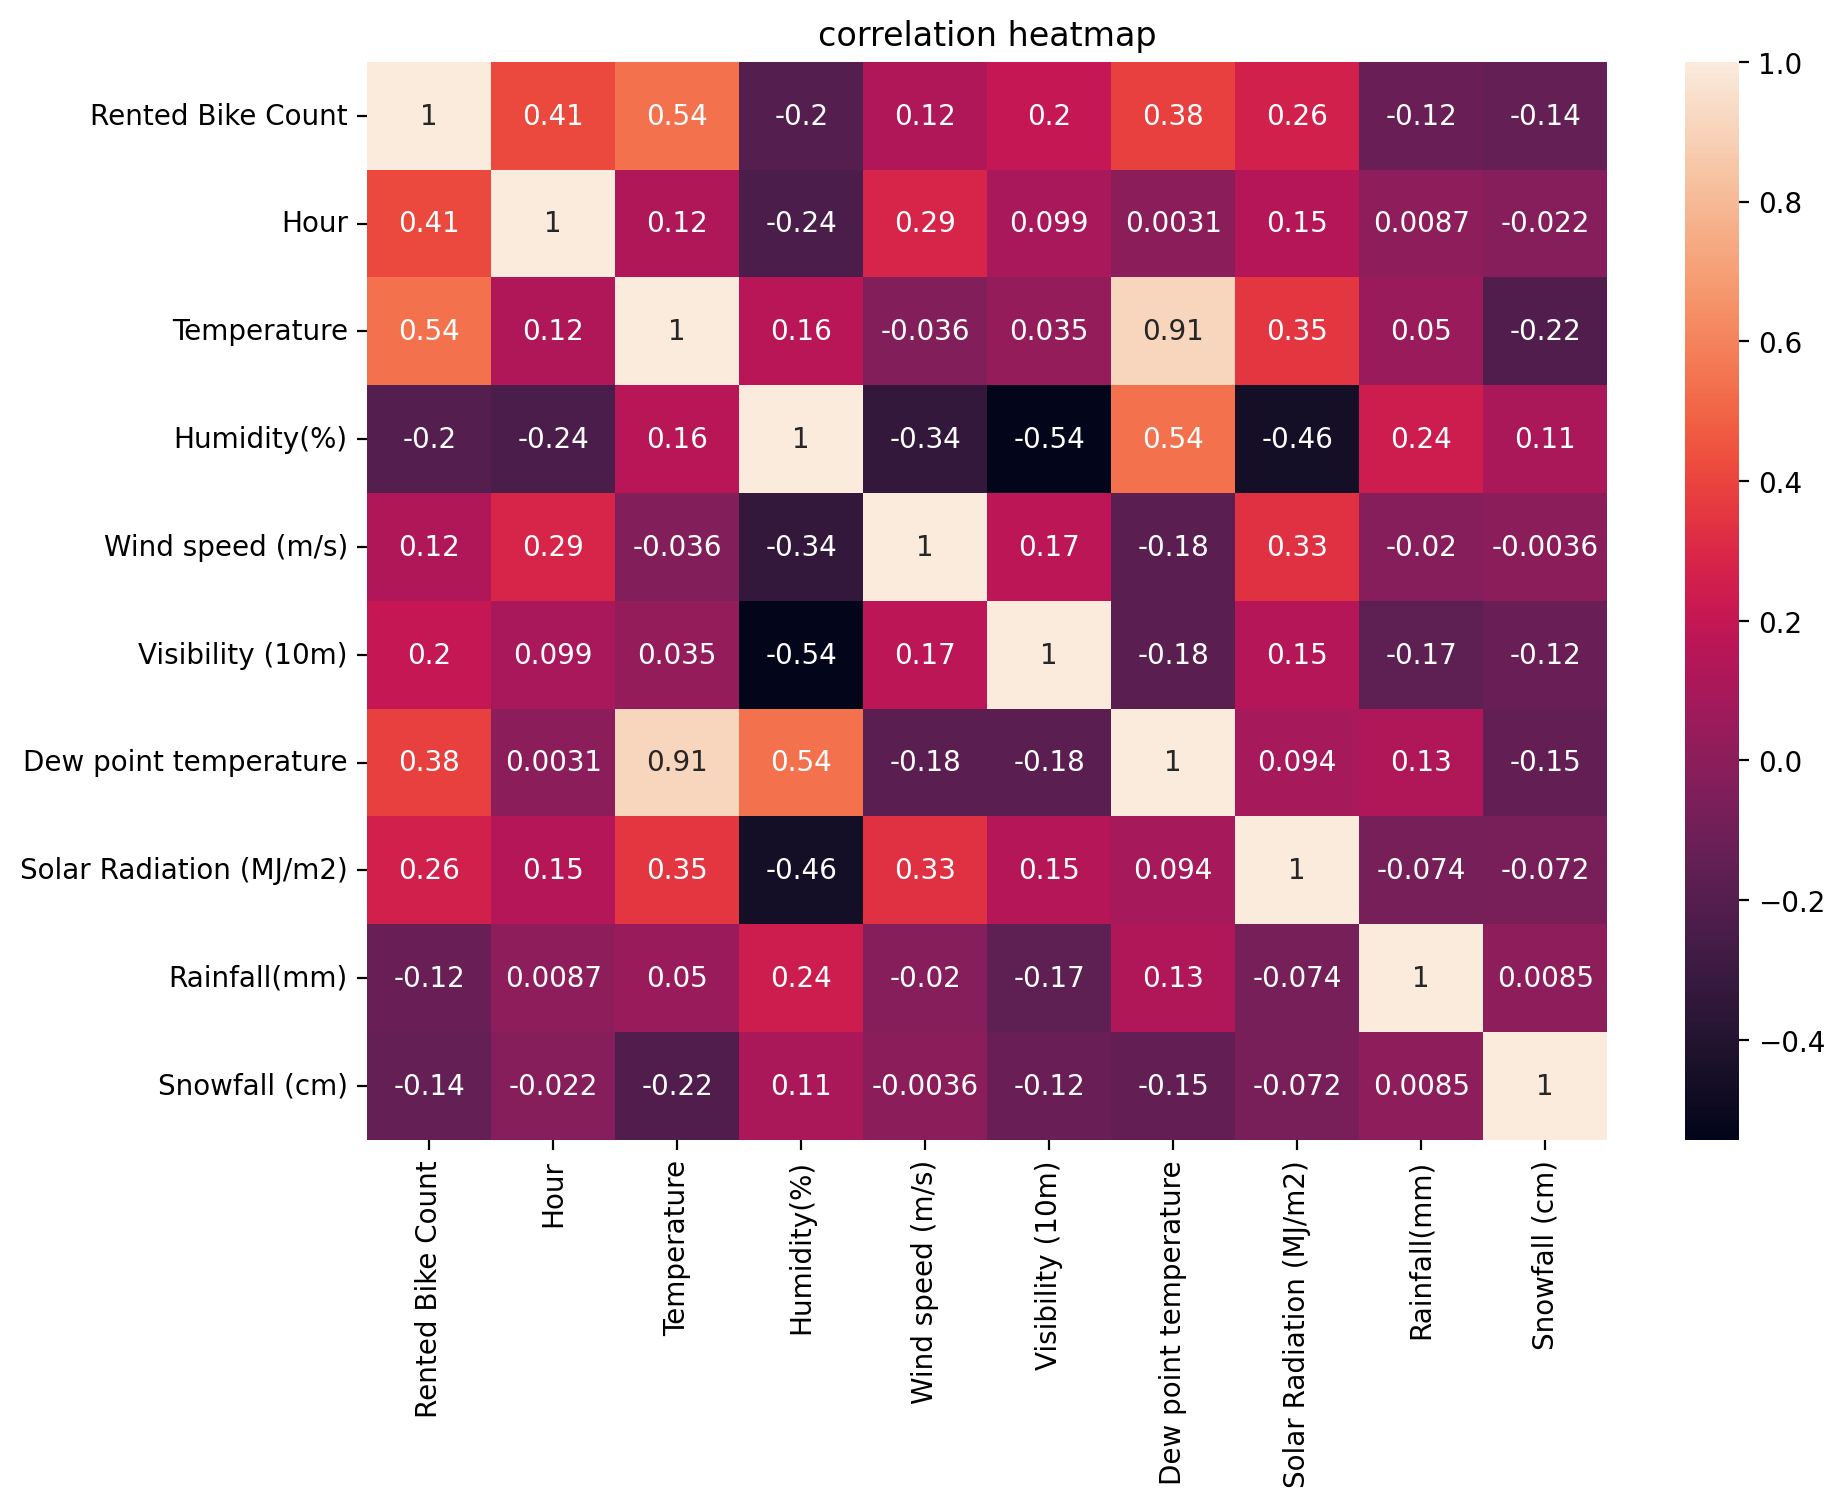

In [276]:
plt.figure(figsize = (10,7))
sns.heatmap(data[['Rented Bike Count', 'Hour', 'Temperature', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']].corr(),annot=True)
plt.title('correlation heatmap')

In [277]:
print(data['Seasons'].value_counts())
print('\n',data['Holiday'].value_counts())
print('\n',data['Functioning Day'].value_counts())

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

 Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

 Functioning Day
Yes    8465
No      295
Name: count, dtype: int64


# Seasons 변수
- 각 계절에 따라 자전거 대여 빈도가 다르게 나올 것
- Seasons 봄 - 1, 여름 - 2, 가을 - 3, 겨울 - 4

In [300]:
## Seasons 봄 - 1, 여름 - 2, 가을 - 3, 겨울 - 4 으로 replace
season_mapping = {'Spring' : 1, 'Summer' : 2, 'Autumn': 3, 'Winter': 4}
data['Seasons'] = data['Seasons'].replace(season_mapping)
print(data['Seasons'].value_counts()) # 봄 : 2208, 여름 : 2208, 가을 : 2184, 겨울 : 2160]

## 계절과 자전거 대여수 평균, 여름에 가장 많고 겨울에 가장 적음을 확인할 수 있음
print('\n',data.groupby(['Seasons'])['Rented Bike Count'].mean()) 

Seasons
1    2208
2    2208
3    2184
4    2160
Name: count, dtype: int64

 Seasons
1     730.031250
2    1034.073370
3     819.597985
4     225.541204
Name: Rented Bike Count, dtype: float64


In [279]:
# plt.bar(['Spring', 'Summer', 'Autumn', 'Winter'], data['Seasons'].value_counts().values) 
# plt.title('Seasons bar plot')
# plt.ylabel('count')
# plt.show()

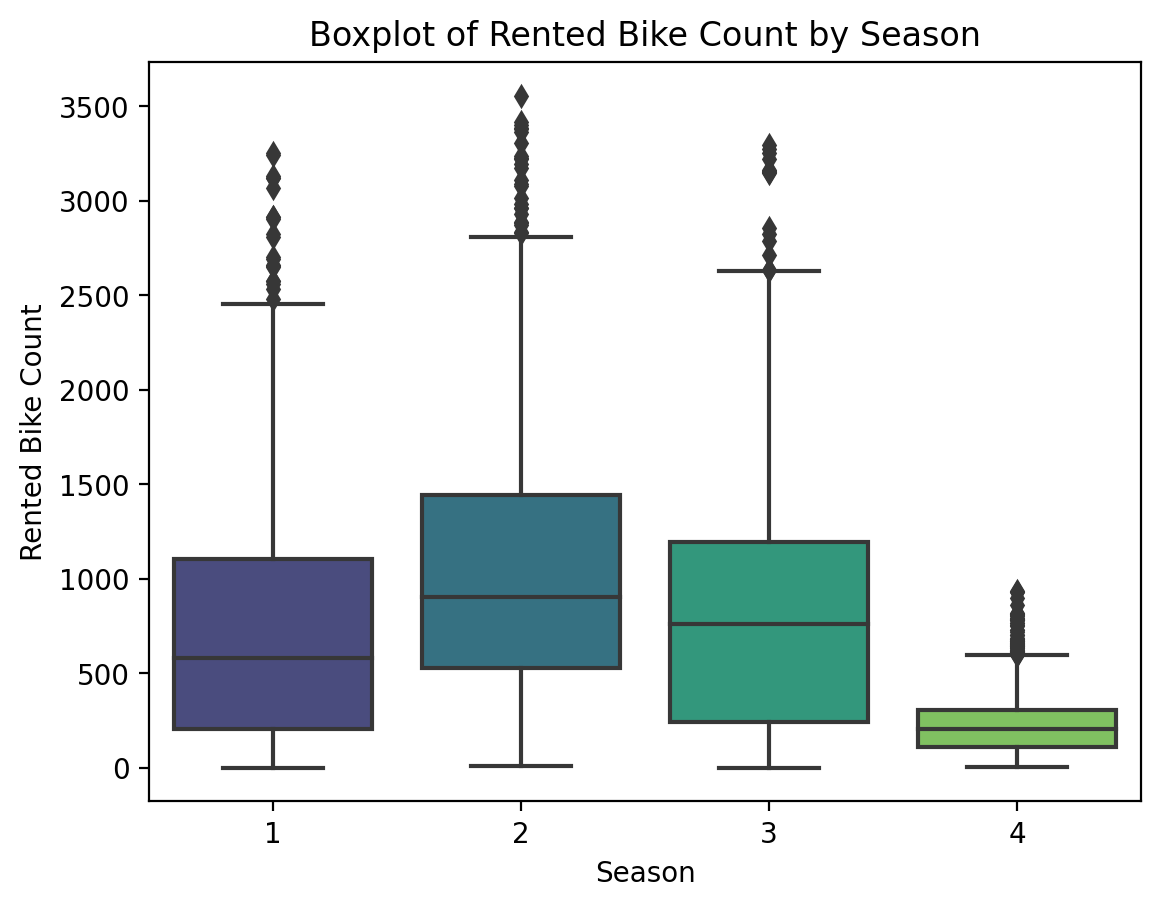

In [280]:
## 계절별 자전거 대여수 boxplot
sns.boxplot(x = 'Seasons', y = 'Rented Bike Count', data=data, palette='viridis')
plt.title('Boxplot of Rented Bike Count by Season')
plt.xlabel('Season')
plt.ylabel('Rented Bike Count')
plt.show()

In [290]:
data[['Rented Bike Count','Seasons']].corr()

,Rented Bike Count,Seasons
Rented Bike Count,1.000000,-0.297095
Seasons,-0.297095,1.000000


# Holiday 변수
- 휴일 여부에 따라 자전거 대여 빈도가 다르게 나올 것으로 예측됨 >> 예측과 다름
- No Holiyday = 0, Holiyday = 1

In [292]:
## No Holiyday = 0, Holiyday = 1 으로 replace
holiday_mapping = {'No Holiday' : 0, 'Holiday' : 1}
data['Holiday'] = data['Holiday'].replace(holiday_mapping)
print(data['Holiday'].value_counts()) # 휴일 - 432
data['Holiday']

## 계절과 자전거 대여수 평균
print('\n',data.groupby(['Holiday'])['Rented Bike Count'].mean()) 

Holiday
0    8328
1     432
Name: count, dtype: int64

 Holiday
0    715.228026
1    499.756944
Name: Rented Bike Count, dtype: float64


In [283]:
# plt.bar(['No Holiday', 'Holiday'], data['Holiday'].value_counts().values) 
# plt.title('Holiday bar plot')
# plt.ylabel('count')
# plt.show()

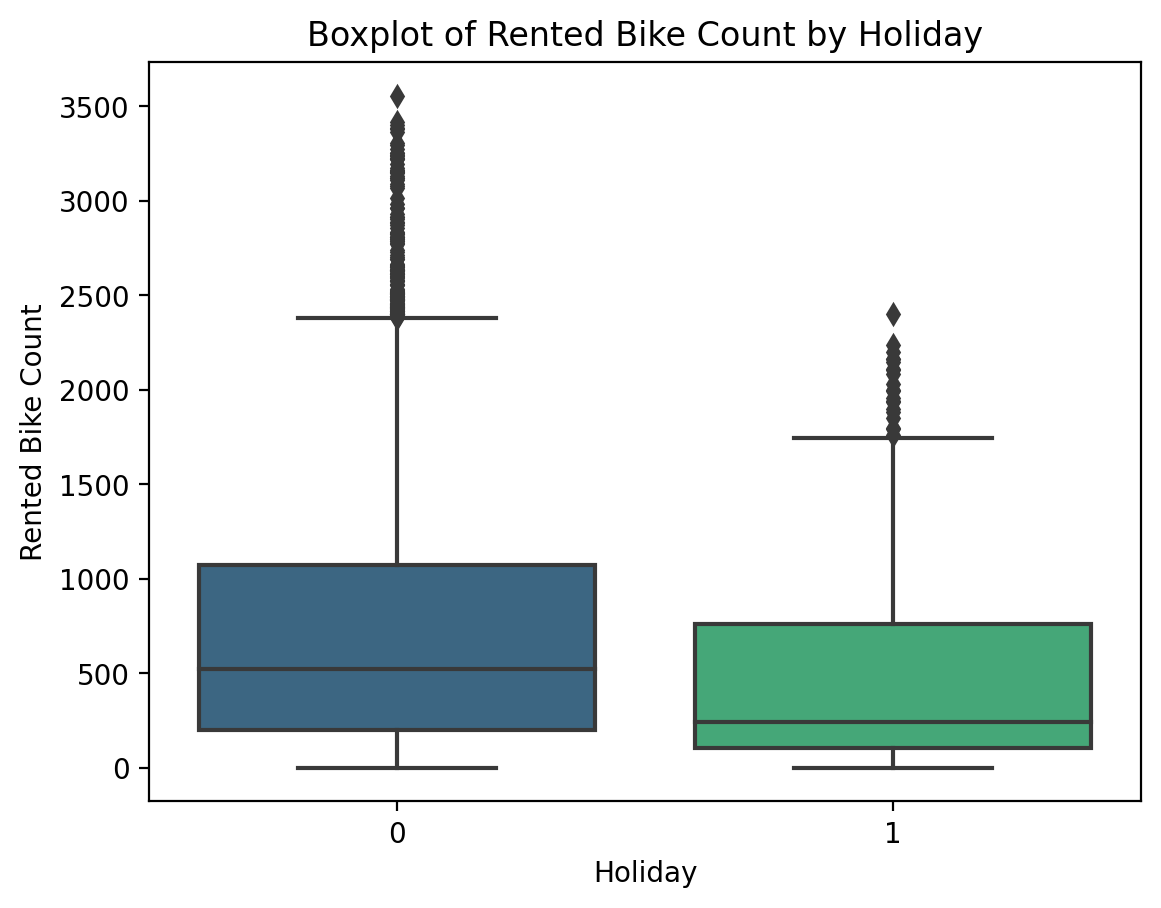

In [284]:
## 휴일 여부에 따른 자전거 대여수 boxplot
sns.boxplot(x = 'Holiday', y = 'Rented Bike Count', data=data, palette='viridis')
plt.title('Boxplot of Rented Bike Count by Holiday')
plt.xlabel('Holiday')
plt.ylabel('Rented Bike Count')
plt.show()

In [285]:
data[['Rented Bike Count','Holiday']].corr()
## 상관성이 별로 없음

,Rented Bike Count,Holiday
Rented Bike Count,1.000000,-0.072338
Holiday,-0.072338,1.000000


# 날짜와 시간대별 대여 횟수 추이 확인
- 8시 부터 20시 까지가 가장 대여수 높음
- 8시, 18시 (출퇴근시간)에 대여수가 높게 나타남 

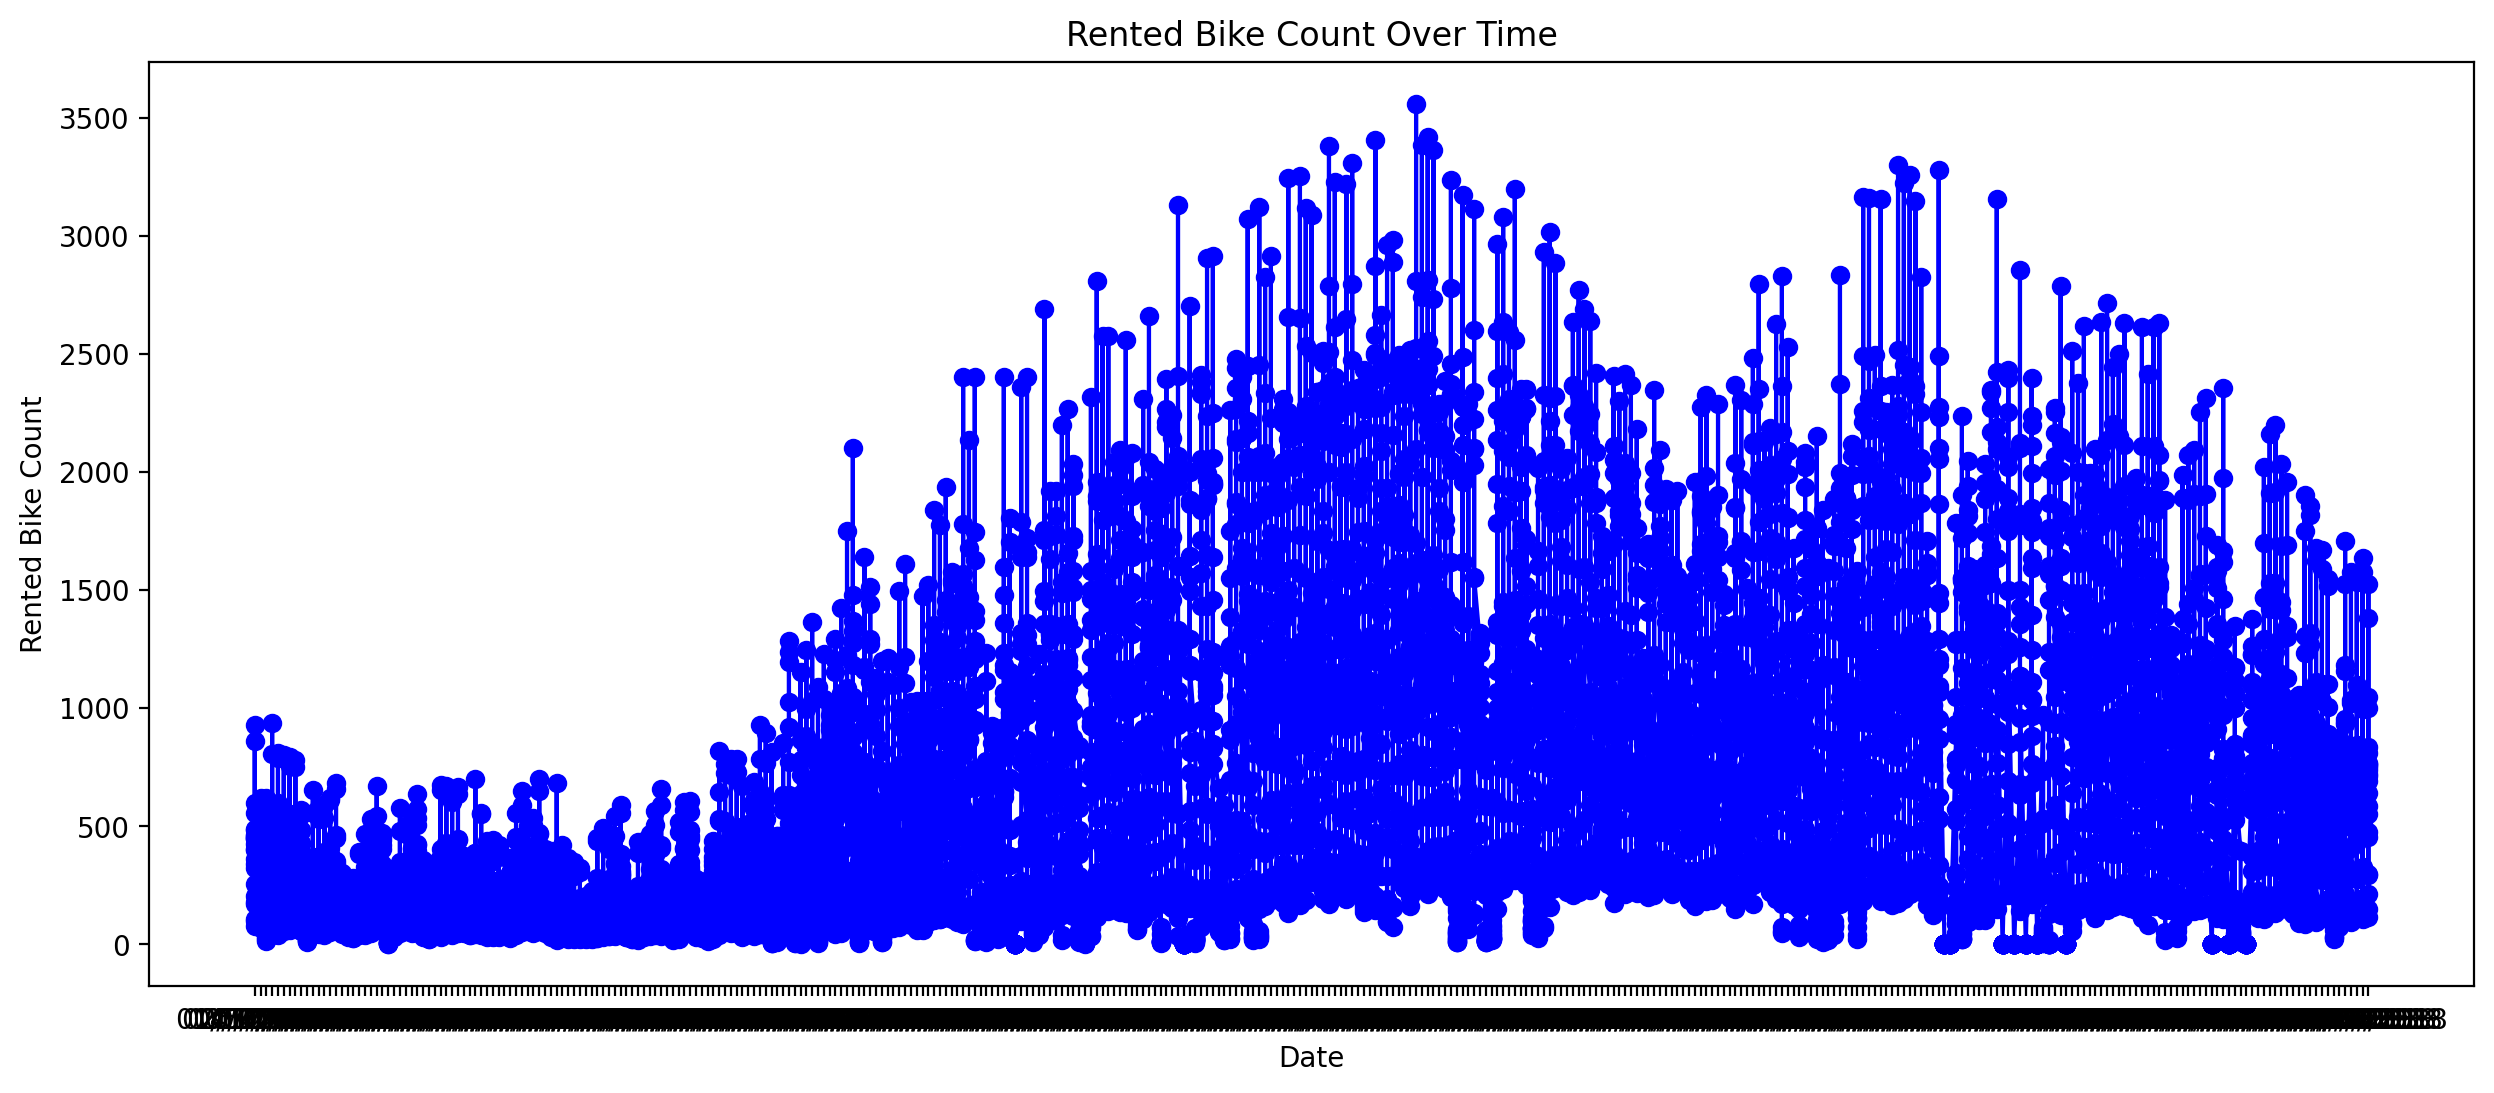

In [286]:
plt.figure(figsize = (15, 6))
plt.plot(data['Date'], data['Rented Bike Count'], marker='o', linestyle='-', color='b')
plt.title('Rented Bike Count Over Time') 
plt.xlabel('Date')
plt.ylabel('Rented Bike Count')
plt.show()

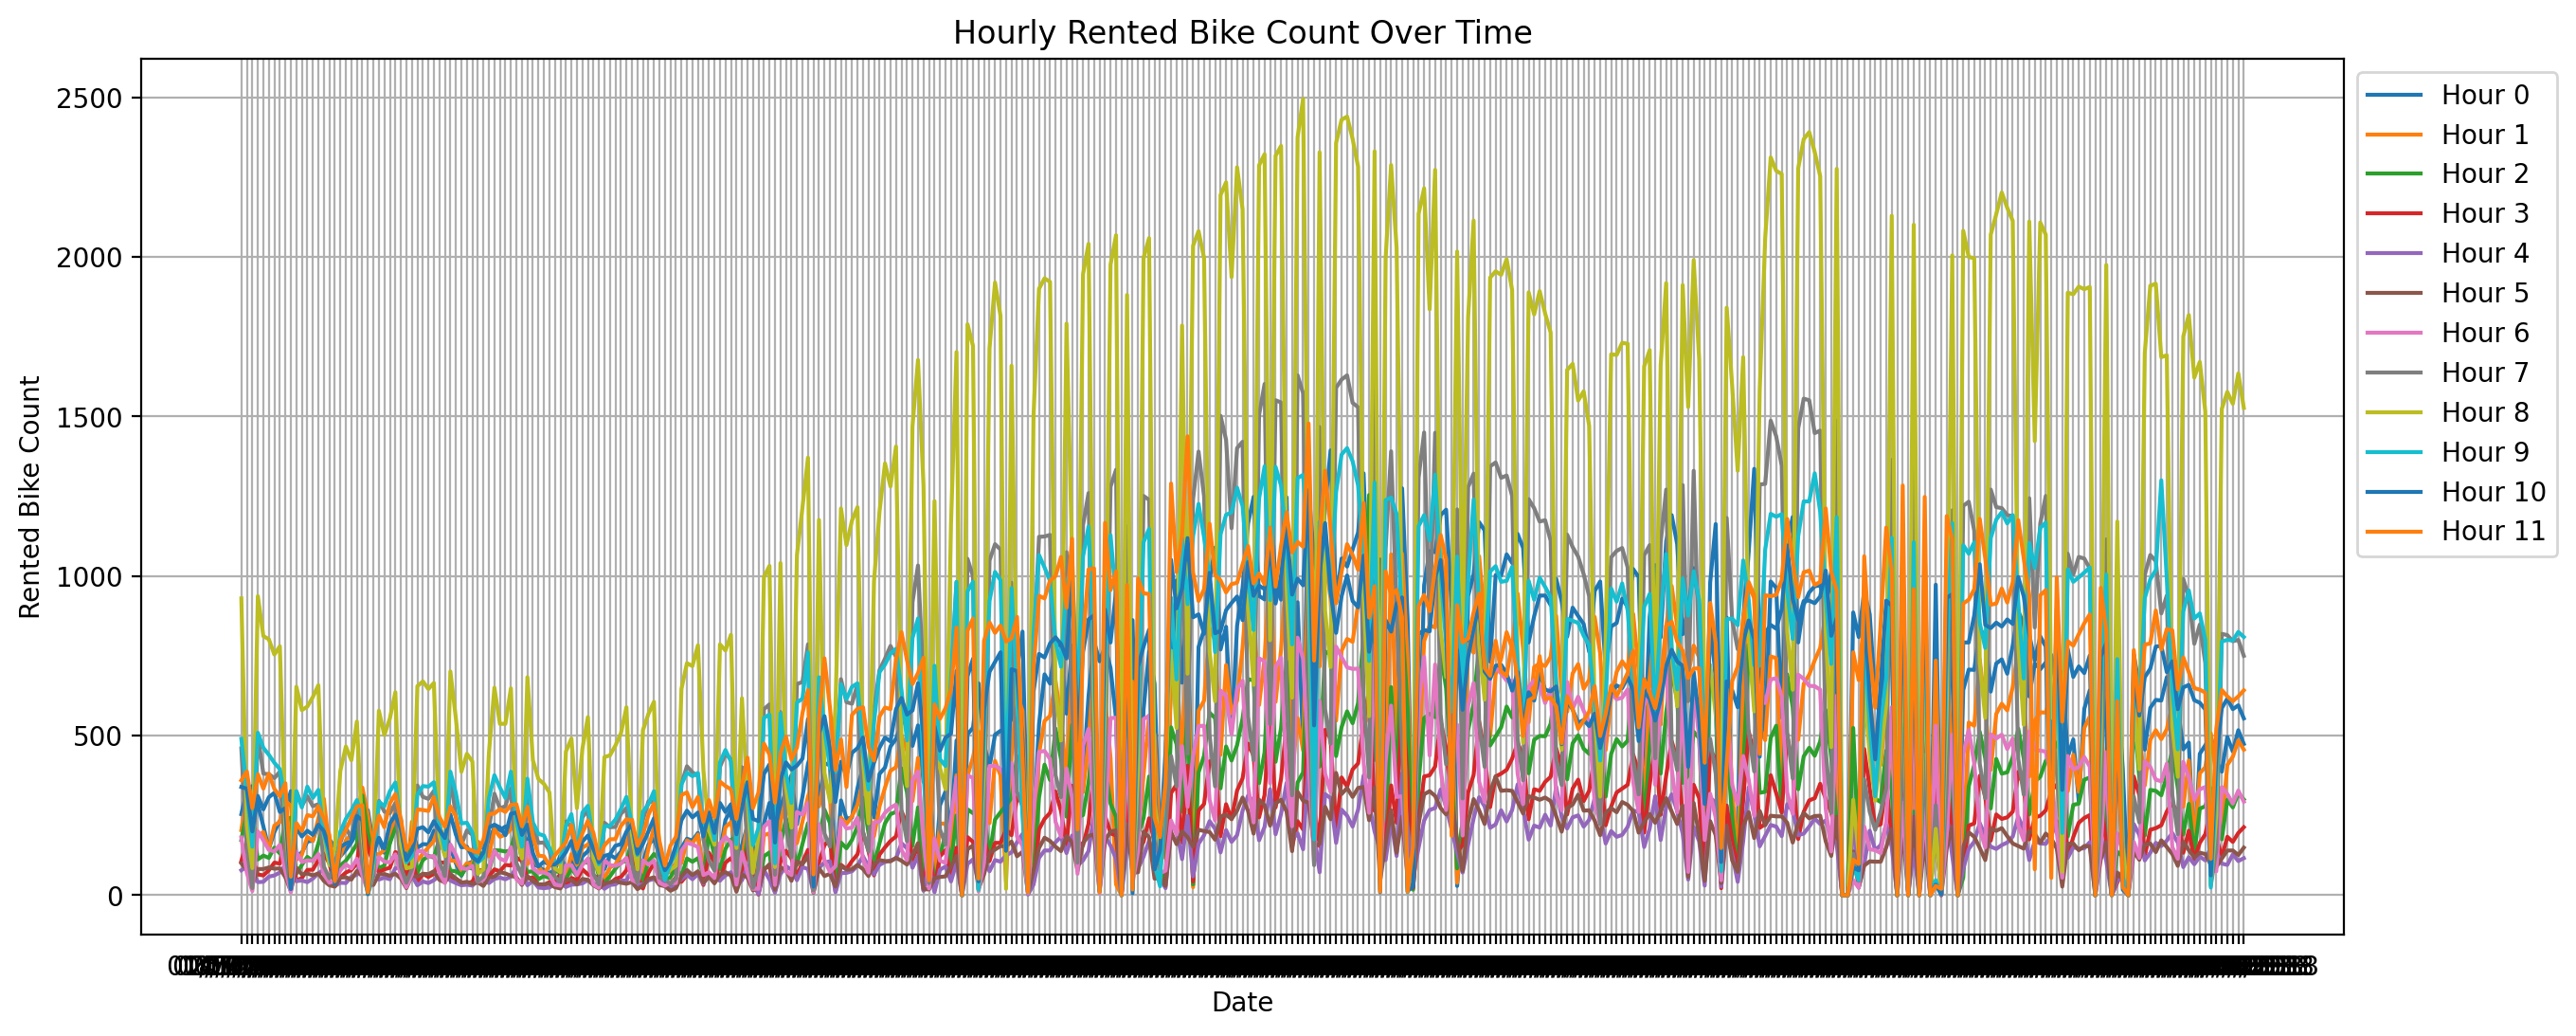

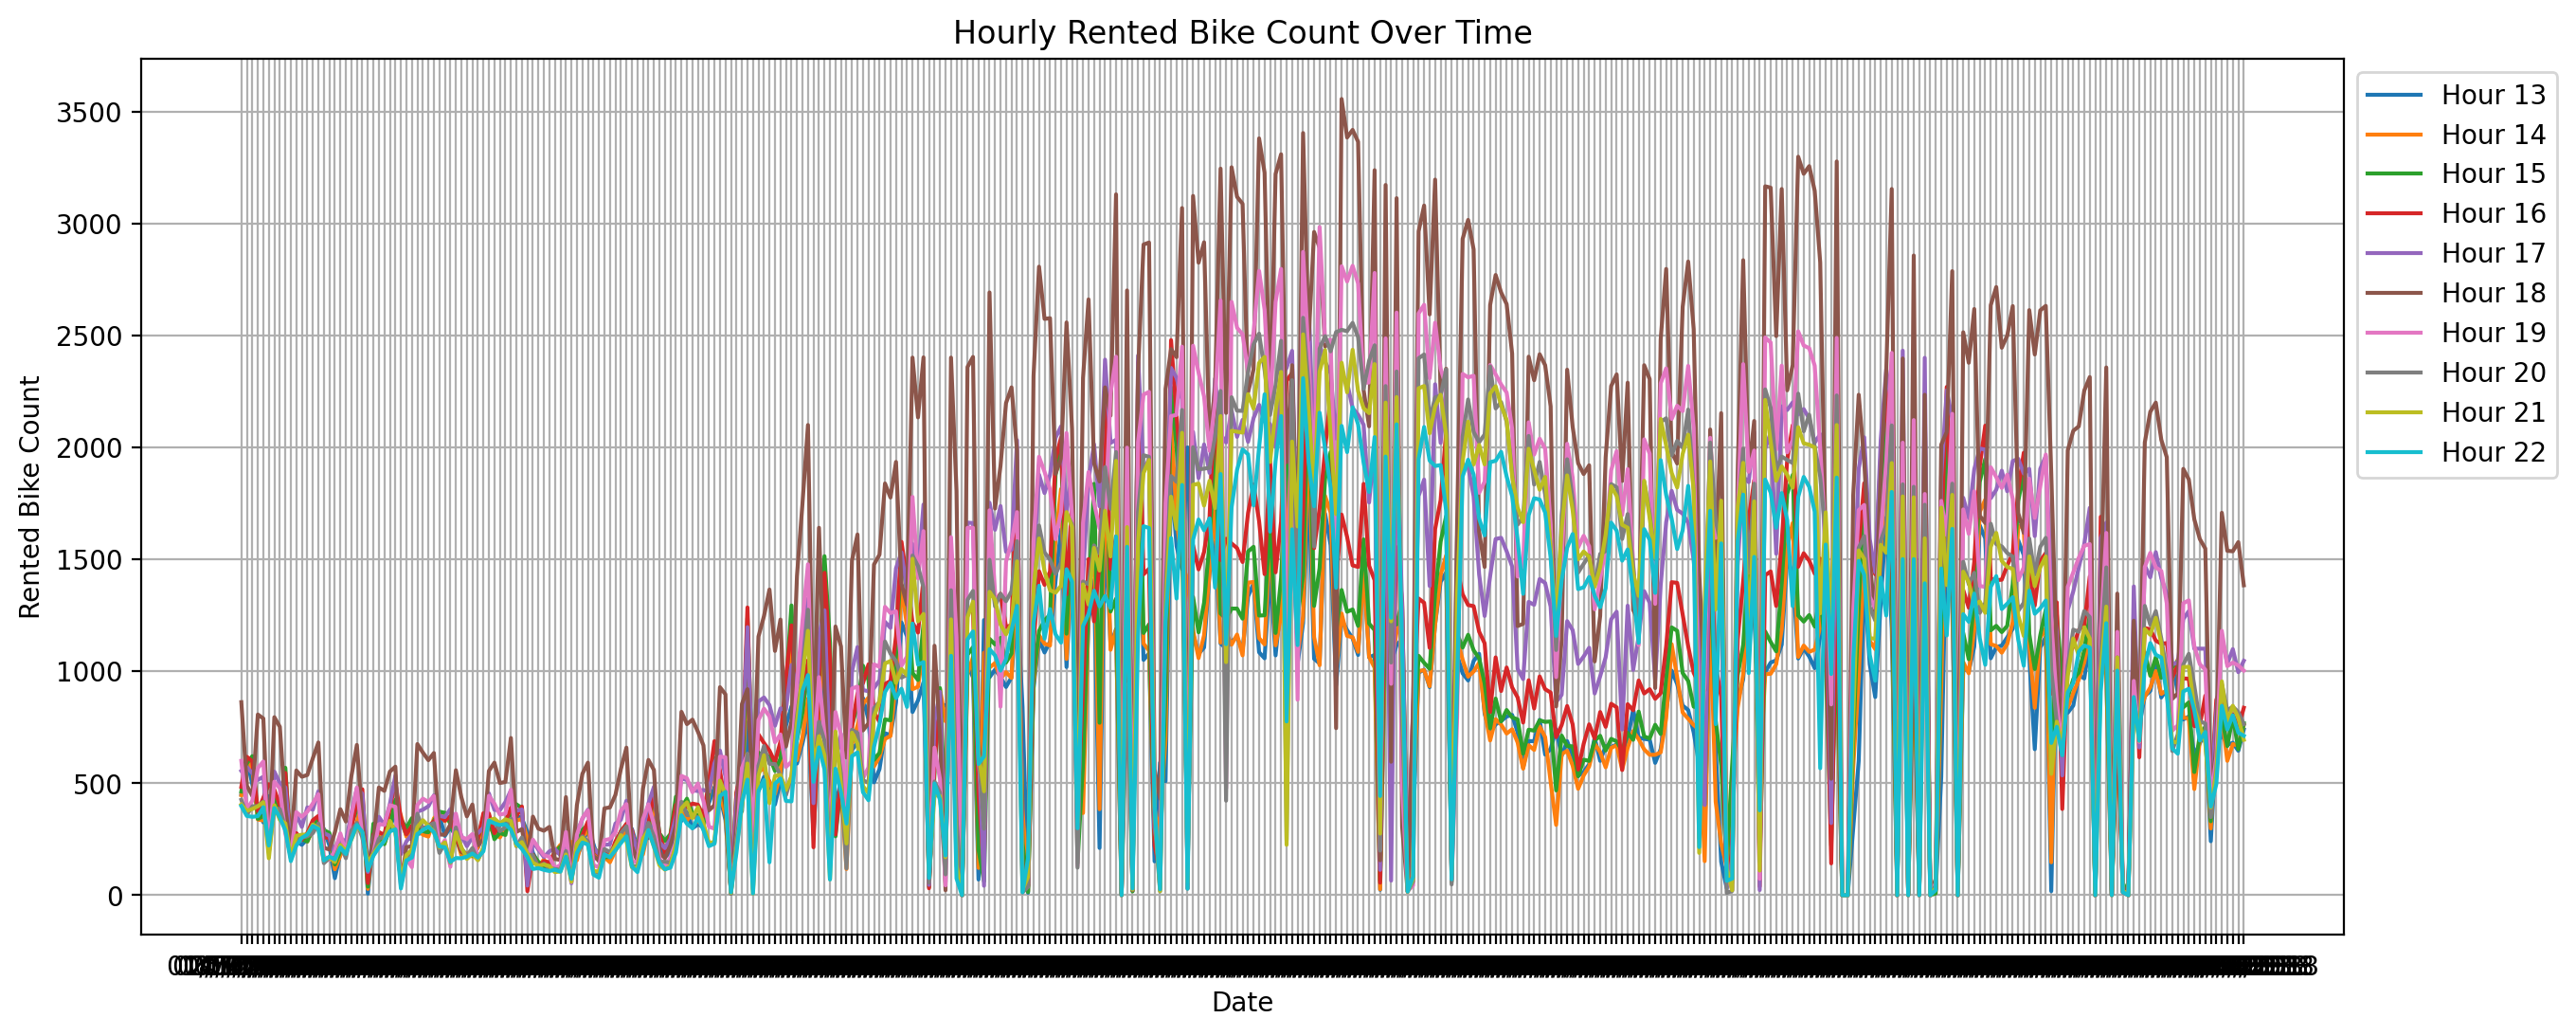

In [287]:
## 0~12시, 자전거 대여수 
plt.figure(figsize=(15, 6))
for hour in range(12):
    hourly_data = data[data['Hour'] == hour]
    plt.plot(hourly_data['Date'], hourly_data['Rented Bike Count'], label=f'Hour {hour}')
plt.title('Hourly Rented Bike Count Over Time')
plt.xlabel('Date')
plt.ylabel('Rented Bike Count')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

## 13~23시, 자전거 대여수
plt.figure(figsize=(15, 6))
for hour in range(13, 23):
    hourly_data = data[data['Hour'] == hour]
    plt.plot(hourly_data['Date'], hourly_data['Rented Bike Count'], label=f'Hour {hour}')
plt.title('Hourly Rented Bike Count Over Time')
plt.xlabel('Date')
plt.ylabel('Rented Bike Count')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

# Functioning Day 변수
- 계절별 운영일 확인 (운영하지 않는 날에는 대여수가 0 이라 평균에 영향을 줌)
- 
- 운영일 'Yes' : 1, 'No' : 0


In [323]:
## 계절별 운영일 여부 
print(data.groupby(['Seasons'])['Functioning Day'].value_counts())

## 운영일 = Yes 
data_func = data[data['Functioning Day'] == 'Yes']
print('\n', data_func.groupby(['Seasons'])['Functioning Day'].value_counts())
print('\n', data.groupby(['Seasons'])['Functioning Day'].mean())

## 운영일 'Yes' : 1, 'No' : 0
Functioning_mapping = {'Yes' : 1, 'No' : 0}
data['Functioning Day'] = data['Functioning Day'].replace(Functioning_mapping)
print('\n', data['Functioning Day'].value_counts())


Seasons  Functioning Day
1        1                  2160
         0                    48
2        1                  2208
3        1                  1937
         0                   247
4        1                  2160
Name: count, dtype: int64

 Series([], Name: count, dtype: int64)

 Seasons
1    0.978261
2    1.000000
3    0.886905
4    1.000000
Name: Functioning Day, dtype: float64

 Functioning Day
1    8465
0     295
Name: count, dtype: int64


In [320]:
data[['Seasons','Functioning Day']].corr ## 상관관계 잘 안보임

,Seasons,Functioning Day
Seasons,1.000000,-0.030785
Functioning Day,-0.030785,1.000000
